In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import json
from google.colab import drive

In [2]:
drive.mount("/content/drive/")
os.listdir("drive/MyDrive/Colab Notebooks/")

Mounted at /content/drive/


['test.ipynb',
 'mnist.ipynb',
 'face_recorded_files',
 'models',
 'pgu_face_training.ipynb',
 'pgu_face_training.ipynb의 사본',
 'mnist_training.ipynb',
 'mnist_training_by_cnn.ipynb']

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


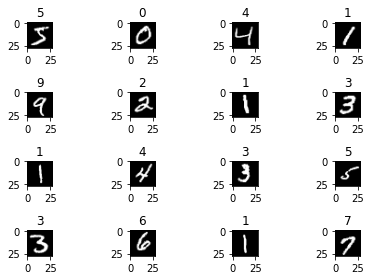

In [18]:
rows = 4
cols = 4
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, a+1))
    subplot_title=(y_train[a])
    axes[-1].set_title(subplot_title)
    plt.imshow(x_train[a], cmap="gray")
fig.tight_layout()
plt.show()

# CNN

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), strides=(1,1), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))
model.add(tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

#계층, 차원, 파라미터 수 요약 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
!watch -d -n 0.5 nvidia-smi

>

Epoch 1/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4543 - accuracy: 0.8849 - val_loss: 0.0659 - val_accuracy: 0.9812
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0616 - val_accuracy: 0.9827
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0530 - val_accuracy: 0.9841
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0373 - accuracy: 0.9895 - val_loss: 0.0643 - val_accuracy: 0.9823
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0903 - val_accuracy: 0.9757
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0628 - val_accuracy: 0.9840
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0538 - val_accuracy:

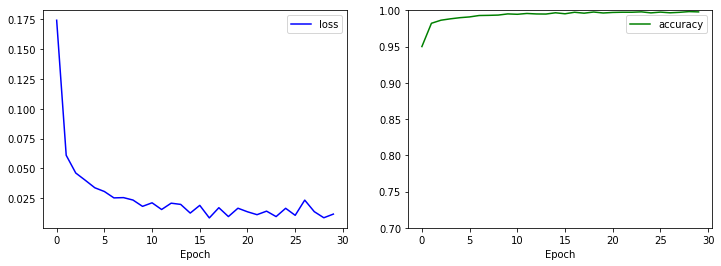

In [22]:
# GPU 메모리 문제 발생 예방
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.8
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

epoch_counts = 30
history = model.fit(
    x_train,
    y_train,
    epochs=epoch_counts,
    # batch_size = batch_size,
    validation_split=0.25
    # callbacks=[early_stopping]
)

#train loss, validation loss 그래프 출력
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

#train accutacy, validation accuracy 그래프 출력
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [24]:
print("최종 결과 : ", model.evaluate(x_test, y_test))

class_name_dic_by_no = {
    "0":"0",
    "1":"1",
    "2":"2",
    "3":"3",
    "4":"4",
    "5":"5",
    "6":"6",
    "7":"7",
    "8":"8",
    "9":"9"
}

#모델 저장
try:
  model_dir = "drive/MyDrive/Colab Notebooks/models/mnist_model"
  json_string = model.to_json()
  open(model_dir + "/pgu_mnist_model_cnn_json.json", "w").write(json_string)
  model.save_weights(model_dir + "/pgu_mnist_model_cnn_weights.h5", overwrite=True)
  with open(model_dir + "/pgu_mnist_model_cnn_names.json", "w") as outfile:
      json.dump(class_name_dic_by_no, outfile)
except:
  print("=================================")
  print("=================================")
  print("모델 저장 중 오류가 발생하였습니다!")
  print("=================================")
  print("=================================")
finally:
  pass

313/313 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9908
최종 결과 :  [0.06050191819667816, 0.9908000230789185]
